In [34]:
import test_models
import pandas as pd
import dataframe_image as dfi
import importlib

importlib.reload(test_models)

data = []
items = ['tables','chairs', 'octopus', 'spiders']
all_scores = []
for k in [0]:
    for ff in ['Projection', 'PCA']:
        for co in ['CubicalCover4-0.15', 'CubicalCover3-0.2']:
            for cl in ['DBSCAN10']:
                print("\nStart computing model accuracy... ")
                scores, scores_wo_homology, majority_classifier = test_models.model_accuracy(k, filter_func=ff, cover=co, clusterer=cl)
                res_w_homology = [x[:2] for x in scores[:3]]
                [all_scores.append((scores[i], (items[k], ff, co, cl))) for i in range(len(scores))]
                res_wo_homology = [x[:2] for x in scores_wo_homology[:3]]
                [all_scores.append((scores_wo_homology[i], (items[k], ff, co, cl))) for i in range(len(scores_wo_homology))]
                res_wo_h = [x[:2] for x in scores_wo_homology if x[1] == res_w_homology[0][1][:-2]] if len(res_w_homology[0][1]) > 2 else [None]
                res_h = [x[:2] for x in scores if x[1] == "h"+res_w_homology[0][1][-1]]
                print(res_w_homology[0][1][:-2], res_wo_h, res_w_homology[0][1][-2:], res_h)
                data.append([items[k], ff, co, cl, res_w_homology[0], res_h[0], res_wo_h[0], majority_classifier])
                print(items[k], ff, co, cl)
                print(res_w_homology[:3], res_wo_homology[0], majority_classifier)

table = pd.DataFrame(data, range(len(data)), ["items", "filter function", "cover", "clusterer", "accuracy scores w homology", "accuracy scores homology", "accuracy score wo homology", "majority classifier"])
dfi.export(table,"results/tables/mytable.png")


Start computing model accuracy... 
- processing data
- computing feature vectors
 99%
- calculating accuracy scores
4 7 10  [(0.7827272727272728, '4 7 10 ')] h3 [(0.7827272727272728, 'h3')]
tables Projection CubicalCover4-0.15 DBSCAN10
[(0.9518181818181819, '4 7 10 h3'), (0.9418181818181818, '7 h3'), (0.9418181818181818, '7 8 h3')] (0.9109090909090909, '5 6 7 9 12 ') 0.7821782178217822

Start computing model accuracy... 
- processing data
- computing feature vectors
 99%
- calculating accuracy scores
4 5 7  [(0.8618181818181819, '4 5 7 ')] h3 [(0.7827272727272728, 'h3')]
tables Projection CubicalCover3-0.2 DBSCAN10
[(0.9609090909090909, '4 5 7 h3'), (0.9509090909090909, '5 7 9 h3'), (0.9509090909090909, '4 7 8 h2')] (0.9209090909090911, '0 5 7 8 10 ') 0.7821782178217822

Start computing model accuracy... 
- processing data
- computing feature vectors
 99%
- calculating accuracy scores
0 1  [(0.9227272727272728, '0 1 ')] h1 [(0.7827272727272728, 'h1')]
tables PCA CubicalCover4-0.15 DBS

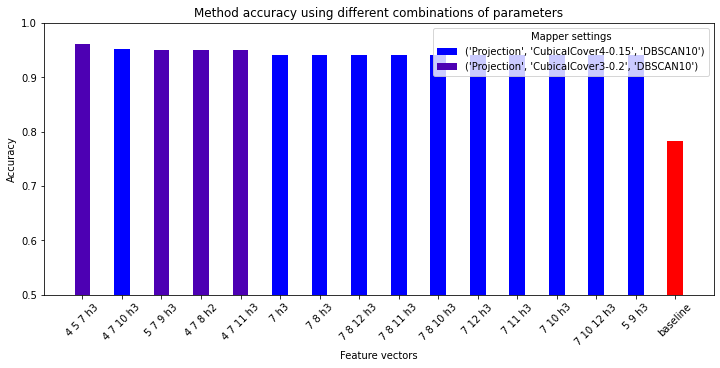

In [35]:
scores = all_scores.copy()
scores.sort(key=lambda x: x[0][0], reverse=True)
test_models.visualize_scores(scores[:15], majority_classifier)